In [1]:
%matplotlib inline
from config_calc import *
import pandas as pd

import cesm_orcas_sci as cesm
import cam
import gv
import metpy.calc as mcalc

import colorbrewer

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['mathtext.default']='regular'

import cartopy.crs as ccrs

In [2]:
lower_trop = np.array([2000.,3000.])
upper_trop = np.array([5000,6000.])
vg_bins = np.concatenate((lower_trop,upper_trop))

th_lower_trop = np.array([285.,290.])
th_upper_trop = np.array([300.,305.])
th_bins = np.concatenate((th_lower_trop,th_upper_trop))

In [3]:
%%time
case = 'bgeos5.B20TRC5CN.f09_g16.BPRD_orcas_sci.004'

tracer_def = cesm.trace_gas_tracers(case)
tracer_3d = [k for k in tracer_def]
varlist = ['CO2','CO2_OCN','CO2_FFF','CO2_LND','Z3','theta']+[v for v in tracer_3d if 'CO2_T09' in v]

ds = cesm.open_casedata(case,'atm','cam.h0',varlist,transformed='scargo_profiles')
ds = cesm.convert_dataset(ds,case)

vgs = []
ths = []
for p in range(len(ds.profile)):
    print('working on %s'%ds.profile.values[p])
    vgt = []
    tht = []
    for l in range(len(ds.time)):
        vg = ds.isel(profile=p,time=l).groupby_bins('Z3',vg_bins).mean()
        vg = vg.isel(Z3_bins=0) - vg.isel(Z3_bins=-1)
        vgt.append(vg)

        th = ds.isel(profile=p,time=l).groupby_bins('theta',th_bins).mean()
        th = th.isel(theta_bins=0) - th.isel(theta_bins=-1)
        tht.append(th)
        
    vgs.append(xr.concat(vgt,dim='time'))
    ths.append(xr.concat(vgt,dim='time'))    
    
vg = xr.concat(vgs,dim='profile')
vg['profile'] = ds.profile
vg.info()

th = xr.concat(ths,dim='profile')
th['profile'] = ds.profile
th.info()

working on 170E,65S
working on 170E,60S
working on Beardmore
working on 170E,70S
working on McMurdo
working on South Pole
working on Christchurch
xarray.Dataset {
dimensions:
	profile = 7 ;
	time = 3347 ;

variables:
	|S12 profile(profile) ;
	float64 CO2(profile, time) ;
	float64 CO2_OCN(profile, time) ;
	float64 CO2_FFF(profile, time) ;
	float64 CO2_LND(profile, time) ;
	float64 Z3(profile, time) ;
	float64 theta(profile, time) ;
	float64 CO2_T09(profile, time) ;
	float64 CO2_T09a(profile, time) ;
	float64 CO2_T09b(profile, time) ;
	float64 CO2_T09c(profile, time) ;
	float64 CO2_T09d(profile, time) ;
	float64 CO2_T09e(profile, time) ;
	float64 CO2_T09f(profile, time) ;
	float64 CO2_T09g(profile, time) ;
	float64 CO2_T09h(profile, time) ;
	float64 CO2_T09i(profile, time) ;
	float64 CO2_T09j(profile, time) ;
	float64 CO2_T09k(profile, time) ;
	float64 CO2_T09l(profile, time) ;

// global attributes:
}xarray.Dataset {
dimensions:
	profile = 7 ;
	time = 3347 ;

variables:
	|S12 profile(pr

In [4]:
%%time
case = 'bgeos5.B20TRC5CN.f09_g16.BPRD_orcas_sci.004'

tracer_def = cesm.trace_gas_tracers(case)
tracer_3d = [k for k in tracer_def]
varlist = ['CO2','CO2_OCN','CO2_FFF','CO2_LND','Z3','theta','SFCO2_OCN']+[v for v in tracer_3d if 'CO2_T09' in v]

ds = cesm.open_casedata(case,'atm','cam.h0',varlist,transformed='so_ocean_mean')
ds = cesm.convert_dataset(ds,case)
print('ds size {:0.2f}GB\n'.format(ds.nbytes / 1e9))
ds.info()

ds size 0.03GB

xarray.Dataset {
dimensions:
	time = 3347 ;
	zlev = 56 ;

variables:
	float64 zlev(zlev) ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
		time:bounds = time_bnds ;
	float64 CO2(time, zlev) ;
		CO2:mdims = 1 ;
		CO2:units = ppmv ;
		CO2:long_name = CO2 ;
		CO2:cell_methods = time: mean ;
		CO2:coordinates = plev ;
	float64 CO2_OCN(time, zlev) ;
		CO2_OCN:mdims = 1 ;
		CO2_OCN:units = ppmv ;
		CO2_OCN:long_name = CO2_OCN ;
		CO2_OCN:cell_methods = time: mean ;
	float64 CO2_FFF(time, zlev) ;
		CO2_FFF:mdims = 1 ;
		CO2_FFF:units = ppmv ;
		CO2_FFF:long_name = CO2_FFF ;
		CO2_FFF:cell_methods = time: mean ;
	float64 CO2_LND(time, zlev) ;
		CO2_LND:mdims = 1 ;
		CO2_LND:units = ppmv ;
		CO2_LND:long_name = CO2_LND ;
		CO2_LND:cell_methods = time: mean ;
	float64 Z3(time, zlev) ;
		Z3:mdims = 1 ;
		Z3:units = m ;
		Z3:long_name = Geopotential Height (above sea level) ;
		Z3:cell_methods = time: mean ;
	float64 theta(time, zlev) ;
		theta:long_name = Potential temper

In [5]:
vg['time'] = ds.time
th['time'] = ds.time
vg.info()
th.info()

xarray.Dataset {
dimensions:
	profile = 7 ;
	time = 3347 ;

variables:
	datetime64[ns] time(time) ;
		time:long_name = time ;
		time:bounds = time_bnds ;
	|S12 profile(profile) ;
	float64 CO2(profile, time) ;
	float64 CO2_OCN(profile, time) ;
	float64 CO2_FFF(profile, time) ;
	float64 CO2_LND(profile, time) ;
	float64 Z3(profile, time) ;
	float64 theta(profile, time) ;
	float64 CO2_T09(profile, time) ;
	float64 CO2_T09a(profile, time) ;
	float64 CO2_T09b(profile, time) ;
	float64 CO2_T09c(profile, time) ;
	float64 CO2_T09d(profile, time) ;
	float64 CO2_T09e(profile, time) ;
	float64 CO2_T09f(profile, time) ;
	float64 CO2_T09g(profile, time) ;
	float64 CO2_T09h(profile, time) ;
	float64 CO2_T09i(profile, time) ;
	float64 CO2_T09j(profile, time) ;
	float64 CO2_T09k(profile, time) ;
	float64 CO2_T09l(profile, time) ;

// global attributes:
}xarray.Dataset {
dimensions:
	profile = 7 ;
	time = 3347 ;

variables:
	datetime64[ns] time(time) ;
		time:long_name = time ;
		time:bounds = time_bnd

In [6]:
vgt = ds.groupby_bins('zlev',vg_bins).mean(dim='zlev')
vgt = vgt.isel(zlev_bins=0) - vgt.isel(zlev_bins=-1)
vgt.info()

xarray.Dataset {
dimensions:
	time = 3347 ;

variables:
	datetime64[ns] time(time) ;
		time:long_name = time ;
		time:bounds = time_bnds ;
	float64 CO2(time) ;
	float64 CO2_OCN(time) ;
	float64 CO2_FFF(time) ;
	float64 CO2_LND(time) ;
	float64 Z3(time) ;
	float64 theta(time) ;
	float64 SFCO2_OCN(time) ;
	float64 CO2_T09(time) ;
	float64 CO2_T09a(time) ;
	float64 CO2_T09b(time) ;
	float64 CO2_T09c(time) ;
	float64 CO2_T09d(time) ;
	float64 CO2_T09e(time) ;
	float64 CO2_T09f(time) ;
	float64 CO2_T09g(time) ;
	float64 CO2_T09h(time) ;
	float64 CO2_T09i(time) ;
	float64 CO2_T09j(time) ;
	float64 CO2_T09k(time) ;
	float64 CO2_T09l(time) ;

// global attributes:
}

2007
2008
2009
2010
2011
2012
2013
2014
2015


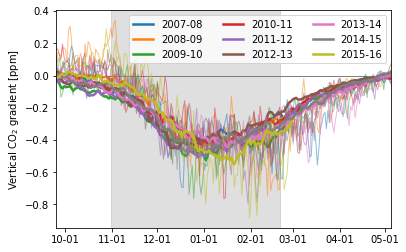

In [26]:
import matplotlib.dates as mdates
from datetime import datetime, date

field_season = np.array([np.datetime64('2007-11-01'),np.datetime64('2008-02-21')])

v = 'CO2_OCN'
year = np.unique([d.astype('datetime64[Y]').astype(int) for d in ds.time.values]) + 1970

fig = plt.figure()#figsize=[12,12])
ax = fig.add_subplot(111)

#-- select profile
nxp = np.where((vg.profile == '170E,60S') | (vg.profile == '170E,65S') | (vg.profile == '170E,70S') | (vg.profile == 'McMurdo'))[0]

ps = []
for y in year[:-1]:
    print(y)
    #-- the timeseries for this year
    season = vg.sel(time = slice(datetime(y,8,1),datetime(y+1,6,1)))        
    time = np.datetime64('2007-08-01') + (season.time.values-season.time[0].values).astype('timedelta64[D]')

    p = ax.plot(time.astype(float),season[v].isel(profile=nxp).mean(dim='profile'),'-',linewidth=1,alpha=0.5)

    season = vgt.sel(time = slice(datetime(y,8,1),datetime(y+1,6,1)))        
    time = np.datetime64('2007-08-01') + (season.time.values-season.time[0].values).astype('timedelta64[D]')
    pi = ax.plot(time.astype(float),season[v],'-',color=p[0].get_color(),linewidth=2.5,label='%04d-%02d'%(y,y-2000+1))
    ps.append(pi[0])
 
ax.axhline(0,linewidth=0.5,color='k',zorder=0)        

ax.axvspan(field_season[0].astype(float),field_season[1].astype(float),  
           alpha=0.25, color='gray')

ax.xaxis.set_major_locator(mdates.MonthLocator())
myFmt = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(myFmt)

ax.set_ylabel('Vertical CO$_2$ gradient [ppm]')
ax.set_xlim(np.datetime64('2007-09-26').astype(float), 
            np.datetime64('2008-05-05').astype(float))

plt.legend(ps,[p.get_label() for p in ps],loc="upper right",ncol=3)
plt.savefig(os.path.join(diro['fig'],'scargo-vg-timeseries.pdf'),dpi=300,
            bbox_inches='tight',transparent=True)

In [25]:
ps[0].get_label()

u'2007-08'

2007 vg: -0.3616±0.1029
2008 vg: -0.3747±0.1403
2009 vg: -0.4255±0.1381
2010 vg: -0.3472±0.1369
2011 vg: -0.4114±0.1089
2012 vg: -0.3576±0.0782
2013 vg: -0.3650±0.1081
2014 vg: -0.3816±0.1277
2015 vg: -0.4037±0.1801
7
std: 33.7877%
std: 0.1294 ppm


/glade/p/work/mclong/miniconda2/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in divide


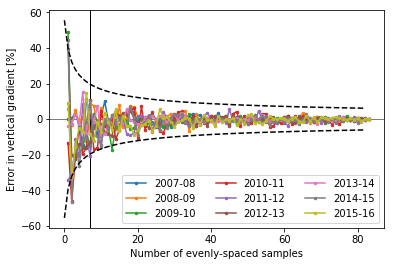

In [29]:
import scipy.stats as st

v = 'CO2_OCN'
nxp = np.where((vg.profile == '170E,60S') | (vg.profile == '170E,65S') | (vg.profile == '170E,70S') | (vg.profile == 'McMurdo'))[0]

field_season = np.array([np.datetime64('2007-12-01'),np.datetime64('2008-02-21')])

fig = plt.figure()#figsize=[12,12])
ax = fig.add_subplot(111)

monte_carlo = False
n_monte = 100


alpha = 0.05

de = 0.05
error_bins = np.arange(-0.6,0.4+de,de)
err_bin_c = np.vstack((error_bins[0:-1],error_bins[1:])).mean(axis=0)
n_days = (np.diff(field_season) + 1)[0].astype(int)

binned = np.zeros((len(error_bins)-1,n_days))
sigma = np.array([])
sigma_ppm = np.array([])
bias = np.ones(len(year)-1)*np.nan
for y in year[:-1]:
    sample_all = vg[v].sel(time = slice(datetime(y,12,1),datetime(y+1,2,21))).isel(profile=nxp).mean(dim='profile')
    truth = vgt[v].sel(time = slice(datetime(y,12,1),datetime(y+1,2,21))).mean()
    print('%d vg: %0.4f±%0.4f'%(y,truth.values,sample_all.std()))

    sigma = np.concatenate((sigma,100.*(sample_all-truth)/truth))
    sigma_ppm = np.concatenate((sigma_ppm,sample_all-truth))
    
    error_n = np.empty((n_monte,n_days))
    
    if monte_carlo:
        for s in range(n_monte):
            for n in range(1,n_days+1):
                err = np.random.choice(sample_all,n,replace=False).mean() - truth
                error_n[s,n-1] = err
                count,_ = np.histogram(err,error_bins)
                binned[:,n-1] += count
            ax.plot(error_n[s,:],'.',markersize=3,alpha=0.5,color='C4')#%d'%(y-year[0]))
    else:
        nsample = np.zeros(n_days)
        dsample = np.zeros(n_days)
        error = np.empty(n_days)
        nx = np.round(n_days/2).astype(int) - 1
        err = 100.*(sample_all[nx].mean() - truth)/truth
        nsample[0] = 1
        dsample[0] = n_days
        error[0] = err
        nsample_biweekly = np.nan
        for n in range(2,n_days+1):
            nx = np.round(np.linspace(1,n_days,n)).astype(int) - 1
            err = 100.*(sample_all[nx].mean() - truth)/truth
            bias[y-year[0]] = err
 
        for n in range(2,n_days+1):
            nx = np.round(np.linspace(1,n_days,n)).astype(int) - 1
            err = 100.*(sample_all[nx].mean() - truth)/truth #- bias[y-year[0]]
            nsample[n-1] = len(nx)
            dsample[n-1] = np.diff(nx).mean()
            if np.isnan(nsample_biweekly) and np.diff(nx).mean() < 14.:
                nsample_biweekly = len(nx)
                
            error[n-1] = err
            
        ax.plot(nsample,error-bias[y-year[0]],'.-',markersize=5,color='C%d'%(y-year[0]),label='%04d-%02d'%(y,y-2000+1))

print(nsample_biweekly)
ax.axvline(nsample_biweekly,color='k',zorder=0,linewidth=1)

binned = binned/binned.sum()
binned[binned==0] = np.nan
        
ax.axhline(0,linewidth=0.5,color='k',zorder=0)
ax.set_xlabel('Number of evenly-spaced samples')
ax.set_ylabel('Error in vertical gradient [%]')

sigma = sigma.std()
sigma_ppm = sigma_ppm.std()
print('std: %0.4f%%'%sigma)
print('std: %0.4f ppm'%sigma_ppm)
N = np.arange(1,len(sample_all)+1,1)
ax.plot(sigma/np.sqrt(N)*st.norm.ppf(1-alpha),'k--')
ax.plot(sigma/np.sqrt(N)*st.norm.ppf(alpha),'k--')

plt.legend(loc="lower right",ncol=3)
if monte_carlo:
    plt.savefig(os.path.join(diro['fig'],'scargo-whole-season-monte-carlo.pdf'),dpi=300,bbox_inches='tight')
else:
    plt.savefig(os.path.join(diro['fig'],'scargo-season-regular-sampling.pdf'),
                dpi=300,bbox_inches='tight',
                transparent=True)

In [30]:
bias_var_flux = bias

2007 vg: -0.2411
2008 vg: -0.2338
2009 vg: -0.2317
2010 vg: -0.2178
2011 vg: -0.2098
2012 vg: -0.2182
2013 vg: -0.2195
2014 vg: -0.2291
2015 vg: -0.2242
7
std: 41.5037%


/glade/p/work/mclong/miniconda2/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in divide


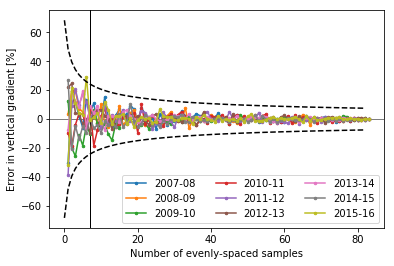

In [43]:
import scipy.stats as st

v = 'CO2_T09'
nxp = np.where((vg.profile == '170E,60S') | (vg.profile == '170E,65S') | (vg.profile == '170E,70S') | (vg.profile == 'McMurdo'))[0]

field_season = np.array([np.datetime64('2007-12-01'),np.datetime64('2008-02-21')])

fig = plt.figure()#figsize=[12,12])
ax = fig.add_subplot(111)

monte_carlo = False
n_monte = 100
sigma = np.array([])

alpha = 0.05

de = 0.05
error_bins = np.arange(-0.6,0.4+de,de)
err_bin_c = np.vstack((error_bins[0:-1],error_bins[1:])).mean(axis=0)
n_days = (np.diff(field_season) + 1)[0].astype(int)

binned = np.zeros((len(error_bins)-1,n_days))

bias = np.ones(len(year)-1)*np.nan
for y in year[:-1]:
    sample_all = vg[v].sel(time = slice(datetime(y,12,1),datetime(y+1,2,21))).isel(profile=nxp).mean(dim='profile')
    truth = vgt[v].sel(time = slice(datetime(y,12,1),datetime(y+1,2,21))).mean()
    print('%d vg: %0.4f'%(y,truth.values))
    sigma = np.concatenate((sigma,100.*(sample_all-truth)/truth))
    
    error_n = np.empty((n_monte,n_days))
    
    if monte_carlo:
        for s in range(n_monte):
            for n in range(1,n_days+1):
                err = np.random.choice(sample_all,n,replace=False).mean() - truth
                error_n[s,n-1] = err
                count,_ = np.histogram(err,error_bins)
                binned[:,n-1] += count
            ax.plot(error_n[s,:],'.',markersize=3,alpha=0.5,color='C4')#%d'%(y-year[0]))
    else:
        nsample = np.zeros(n_days)
        dsample = np.zeros(n_days)
        error = np.empty(n_days)
        nx = np.round(n_days/2).astype(int) - 1
        err = 100.*(sample_all[nx].mean() - truth)/truth
        nsample[0] = 1
        dsample[0] = n_days
        error[0] = err
        nsample_biweekly = np.nan
        for n in range(2,n_days+1):
            nx = np.round(np.linspace(1,n_days,n)).astype(int) - 1
            err = 100.*(sample_all[nx].mean() - truth)/truth
            bias[y-year[0]] = err
 
        for n in range(2,n_days+1):
            nx = np.round(np.linspace(1,n_days,n)).astype(int) - 1
            err = 100.*(sample_all[nx].mean() - truth)/truth #- bias[y-year[0]]
            nsample[n-1] = len(nx)
            dsample[n-1] = np.diff(nx).mean()
            if np.isnan(nsample_biweekly) and np.diff(nx).mean() < 14.:
                nsample_biweekly = len(nx)
                
            error[n-1] = err
            
        ax.plot(nsample,error-bias[y-year[0]],'.-',markersize=5,color='C%d'%(y-year[0]),label='%04d-%02d'%(y,y-2000+1))

print(nsample_biweekly)
ax.axvline(nsample_biweekly,color='k',zorder=0,linewidth=1)

binned = binned/binned.sum()
binned[binned==0] = np.nan
        
ax.axhline(0,linewidth=0.5,color='k',zorder=0)
ax.set_xlabel('Number of evenly-spaced samples')
ax.set_ylabel('Error in vertical gradient [%]')

sigma = sigma.std()
print('std: %0.4f%%'%sigma)
N = np.arange(1,len(sample_all)+1,1)
ax.plot(sigma/np.sqrt(N)*st.norm.ppf(1-alpha),'k--')
ax.plot(sigma/np.sqrt(N)*st.norm.ppf(alpha),'k--')

plt.legend(loc="lower right",ncol=3)
if monte_carlo:
    plt.savefig(os.path.join(diro['fig'],'scargo-whole-season-monte-carlo.pdf'),dpi=300,bbox_inches='tight')
else:
    plt.savefig(os.path.join(diro['fig'],'scargo-season-regular-sampling-T09_CO2.pdf'),
                dpi=300,bbox_inches='tight',
                transparent=True)

In [32]:
bias_const_flux = bias

### plot the year-by-year bias

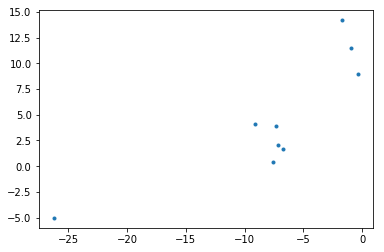

In [33]:
plt.plot(bias_const_flux,bias_var_flux,'.')

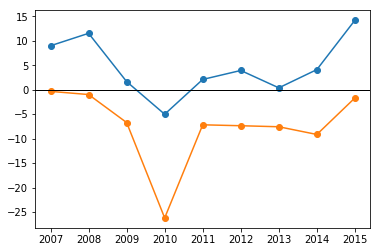

In [34]:
plt.plot(year[:-1],bias_var_flux,'o-')
plt.plot(year[:-1],bias_const_flux,'o-')
plt.axhline(0.,color='k',linewidth=1)

In [35]:
v = 'SFCO2_OCN'
sf = np.empty(len(year)-1)
for y in year[:-1]:
    sf[y-year[0]] = ds[v].sel(time = slice(datetime(y,12,1),datetime(y+1,1,21))).mean()

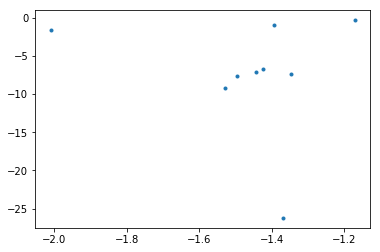

In [36]:
plt.plot(sf,bias,'.')

In [37]:
nsample_biweekly

7

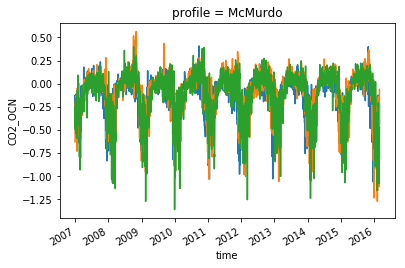

In [38]:
plt.figure()
vg.CO2_OCN.sel(profile='170E,60S').plot()
vg.CO2_OCN.sel(profile='170E,70S').plot()
vg.CO2_OCN.sel(profile='McMurdo').plot()

In [39]:
bias

array([ -0.3555292 ,  -1.0008296 ,  -6.72319308, -26.210443  ,
        -7.18378681,  -7.37312636,  -7.58389865,  -9.15905846,
        -1.69452783])

In [40]:
for n in range(2,n_days+1):
    nx = np.round(np.linspace(1,n_days,n)).astype(int) - 1
    #nx = np.round(np.linspace(1,n_days,n)).astype(int) - 1
    print(np.diff(nx).mean())

82.0
41.0
27.333333333333332
20.5
16.4
13.666666666666666
11.714285714285714
10.25
9.11111111111111
8.2
7.454545454545454
6.833333333333333
6.3076923076923075
5.857142857142857
5.466666666666667
5.125
4.823529411764706
4.555555555555555
4.315789473684211
4.1
3.9047619047619047
3.727272727272727
3.5652173913043477
3.4166666666666665
3.28
3.1538461538461537
3.037037037037037
2.9285714285714284
2.8275862068965516
2.7333333333333334
2.6451612903225805
2.5625
2.484848484848485
2.411764705882353
2.342857142857143
2.2777777777777777
2.2162162162162162
2.1578947368421053
2.1025641025641026
2.05
2.0
1.9523809523809523
1.9069767441860466
1.8636363636363635
1.8222222222222222
1.7826086956521738
1.7446808510638299
1.7083333333333333
1.6734693877551021
1.64
1.607843137254902
1.5769230769230769
1.5471698113207548
1.5185185185185186
1.490909090909091
1.4642857142857142
1.4385964912280702
1.4137931034482758
1.3898305084745763
1.3666666666666667
1.3442622950819672
1.3225806451612903
1.3015873015873016


In [41]:
vg

<xarray.Dataset>
Dimensions:   (profile: 7, time: 3347)
Coordinates:
  * time      (time) datetime64[ns] 2007-01-01 2007-01-02 2007-01-03 ...
  * profile   (profile) |S12 '170E,65S' '170E,60S' 'Beardmore' '170E,70S' ...
Data variables:
    CO2       (profile, time) float64 -0.5524 -0.5422 -0.6128 -0.5963 ...
    CO2_OCN   (profile, time) float64 -0.3077 -0.4335 -0.4979 -0.5 -0.3838 ...
    CO2_FFF   (profile, time) float64 -0.1758 -0.175 -0.2207 -0.1793 -0.1053 ...
    CO2_LND   (profile, time) float64 -0.08151 0.06213 0.08517 0.06026 ...
    Z3        (profile, time) float64 -2.98e+03 -2.945e+03 -2.921e+03 ...
    theta     (profile, time) float64 -14.1 -14.3 -12.02 -10.18 -13.29 ...
    CO2_T09   (profile, time) float64 -0.2121 -0.2249 -0.3017 -0.3282 -0.214 ...
    CO2_T09a  (profile, time) float64 -0.1621 -0.1401 -0.2049 -0.2359 ...
    CO2_T09b  (profile, time) float64 -0.2031 -0.1998 -0.2699 -0.2969 ...
    CO2_T09c  (profile, time) float64 -0.1871 -0.1826 -0.2535 -0.2827 ...
   